In [1]:
import pandas as pd 
import numpy as np 

df = pd.read_csv("forest_cover.csv")

In [2]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [3]:
### Half a million training examples w/ 55 features 
### That's a lot of data to work with, lets reduce it by 90%

df = df.sample(50000)

In [4]:
print(df['Cover_Type'].unique)

<bound method Series.unique of 198577    1
393753    1
315219    2
425811    3
72749     2
         ..
432706    2
351248    6
478076    2
244349    2
369517    7
Name: Cover_Type, Length: 50000, dtype: int64>


In [5]:
### train test split 
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Cover_Type'])
Y = df['Cover_Type']
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [6]:
### We'll start with a logistic regression classifier 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
## Using the provided hyper-parameters that were provided in the lab spec
lr = LogisticRegression(C=0.000000001,solver='liblinear',max_iter=1000)

lr.fit(train_x, train_y)

hyp = lr.predict(test_x)

print(accuracy_score(test_y, hyp))

0.50496


In [7]:
### :(

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()

dt.fit(train_x, train_y)
hyp = dt.predict(test_x)
print(accuracy_score(test_y, hyp))

0.80736


In [9]:
### Much better performance, intuition deduces that random forest will likely perform better 

In [10]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

rf.fit(train_x, train_y)
hyp = rf.predict(test_x)
print(accuracy_score(test_y, hyp))

0.8768


[Text(1307.2887612848638, 1075.6340425531916, 'X[17] <= 0.5\ngini = 0.621\nsamples = 23729\nvalue = [13718, 18317, 2336, 170, 582, 1091, 1286]'),
 Text(1232.5295640694228, 1052.5021276595744, 'X[51] <= 0.5\ngini = 0.612\nsamples = 23245\nvalue = [13707, 18115, 1831, 150, 558, 1064, 1278]'),
 Text(1106.3964309036774, 1029.3702127659576, 'X[2] <= 21.5\ngini = 0.603\nsamples = 22610\nvalue = [13143, 18066, 1831, 150, 558, 1064, 864]'),
 Text(991.6491629476269, 1006.2382978723405, 'X[52] <= 0.5\ngini = 0.577\nsamples = 19144\nvalue = [11650, 15771, 947, 96, 403, 633, 732]'),
 Text(869.548080882622, 983.1063829787234, 'X[42] <= 0.5\ngini = 0.569\nsamples = 18762\nvalue = [11326, 15751, 947, 96, 403, 633, 464]'),
 Text(756.6726350621218, 959.9744680851064, 'X[26] <= 0.5\ngini = 0.592\nsamples = 14389\nvalue = [8727, 11469, 947, 96, 362, 633, 407]'),
 Text(701.1757445231461, 936.8425531914894, 'X[23] <= 0.5\ngini = 0.592\nsamples = 14028\nvalue = [8618, 11082, 947, 96, 305, 622, 407]'),
 Text

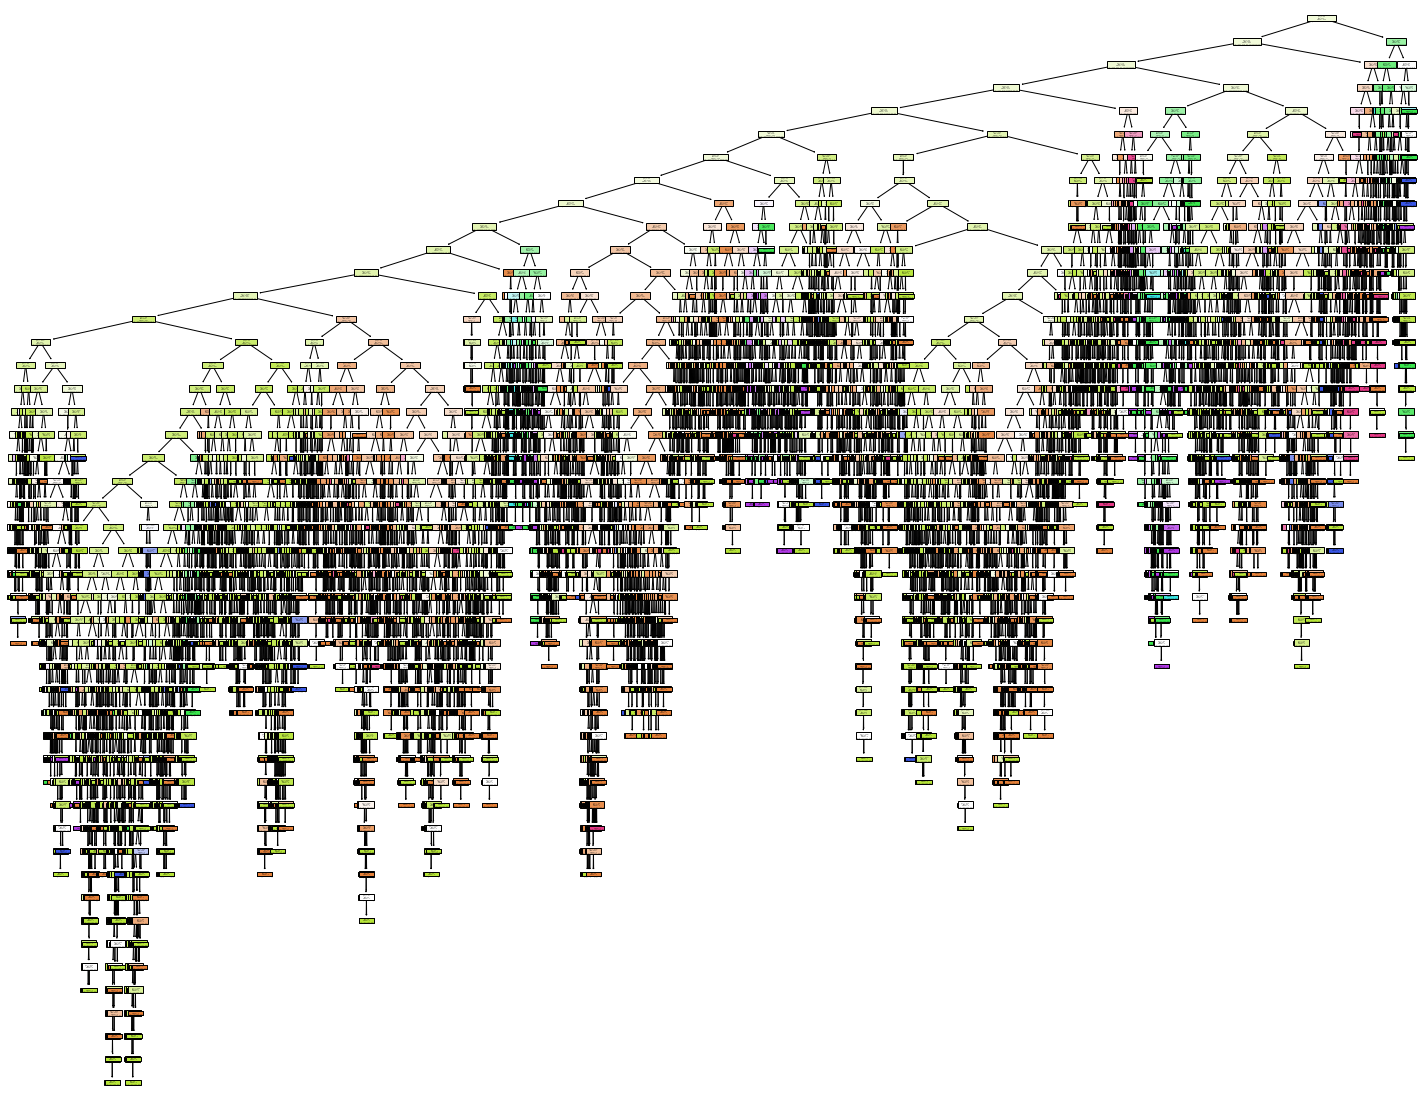

In [11]:
%matplotlib inline
from sklearn import tree
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(25,20))
rand_forest_estimators = rf.estimators_
tree.plot_tree(rf[0],
               filled = True)

### Gini Impurity measures the likelihood of an incorrect classification of some new instance of a random variable  by computing a summation of the Probability of an instance and scaling it by it's complement. This is used to determine the optimal split from a root node into subsequent splits.  Samples refers to the number of data instances being observed within a specific node, typically it should go down as you further traverse the tree and split into consequent nodes.  Value refers to the split of samples at each individual node ie how a node splits it's samples to it's two children.  Conditions are the nodes themselves and also refers to other features that serve importance. 

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, hyp)

array([[3862,  654,    2,    0,    1,    0,   22],
       [ 402, 5674,   34,    0,    7,   18,    3],
       [   0,   44,  674,    6,    1,   31,    0],
       [   0,    0,   16,   46,    0,    1,    0],
       [   8,   90,    0,    0,   87,    0,    0],
       [   0,   50,   76,    4,    0,  253,    0],
       [  66,    4,    0,    0,    0,    0,  364]])

### Intuition was right
### The best classifier was RandomForest, this makes sense as it uses a collection of decision trees comparative to a single tree resulting in better performance than the Decision Tree Classifier.  Logistic Regression performed poorly likely due to the fact that the algorithm assumes linearity and is much better suited as a probablistic tool for understanding the relationship of independent to dependent variables.  There was obviously very little linearity in this data set as it performed as effeciently as 
### From seeing the decision tree visualization, it's apparent that thousands of binary choices are being generated by each tree with some very immense depth